In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


### Data Splitting

In [27]:
X = data.drop('Y',axis=1)
X.drop('ID',axis=1,inplace=True)
y = data['Y']


#### Replacing null values with columns mean

In [28]:
X.fillna(X.mean(),inplace=True)

### Feature Scaling

In [29]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,X1,X2,X3,Z1,Z2,A,B
0,-0.602669,-0.346858,-0.684256,-0.737047,-0.620227,-0.837070,-0.576601
1,-1.146234,-0.807953,-0.853647,-0.740299,-0.793181,-0.889482,-0.576601
2,0.415249,-0.116311,-0.430169,-0.402100,-0.027242,0.485872,-0.496915
3,-0.781606,-0.577405,-0.768952,-0.753307,-0.743766,-0.859001,-0.576601
4,-1.146234,-0.807953,0.359194,2.140899,-0.138427,-0.928513,-0.576601


## Clustering

In [30]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
X['cluster_all_features'] = kmeans.predict(X_scaled)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
X['cluster_all_features'].value_counts()

cluster_all_features
1    27
0    13
Name: count, dtype: int64

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

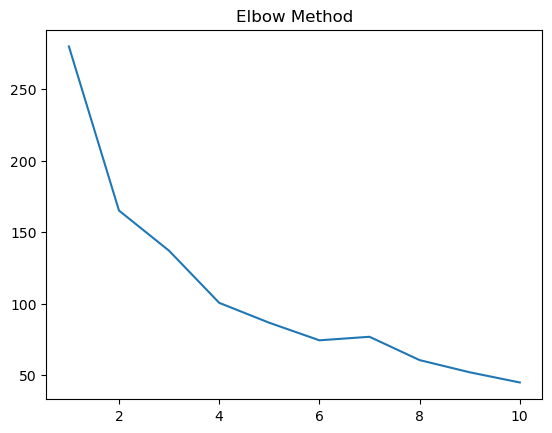

In [32]:
### Elbow Method

# elbow method to determine the number of clusters
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.show()


In [33]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
X['4_clusters_all_features'] = kmeans.predict(X_scaled)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
X['4_clusters_all_features'].value_counts()

4_clusters_all_features
0    22
2    11
1     6
3     1
Name: count, dtype: int64

In [35]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled[['X1','X2']])
X['4_clusters_all_X1X2'] = kmeans.predict(X_scaled[['X1','X2']])

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
X['4_clusters_all_X1X2'] .value_counts()

4_clusters_all_X1X2
2    16
0    16
1     7
3     1
Name: count, dtype: int64

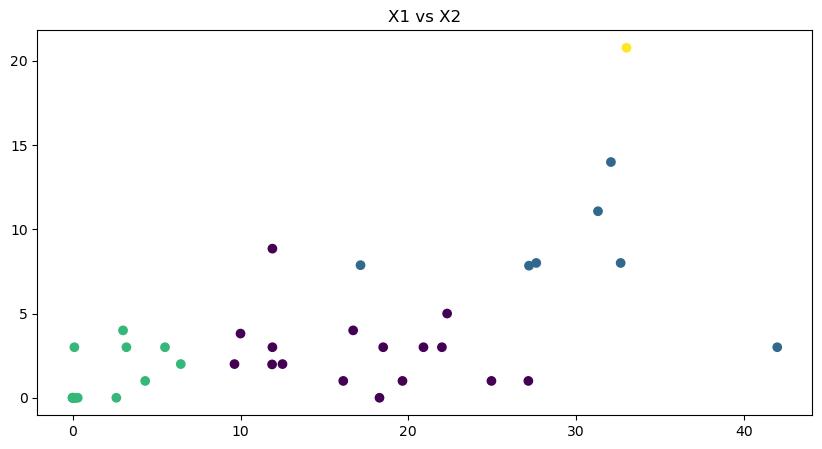

In [37]:
# plotting the clusters
plt.figure(figsize=(10,5))

plt.scatter(X['X1'],X['X2'],c=X['4_clusters_all_X1X2'])
plt.title('X1 vs X2')
plt.show()



